# Preprocess

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./US-Economic-News.csv", delimiter=',', encoding= 'ISO-8859-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               8000 non-null   int64  
 1   _golden                8000 non-null   bool   
 2   _unit_state            8000 non-null   object 
 3   _trusted_judgments     8000 non-null   int64  
 4   _last_judgment_at      8000 non-null   object 
 5   positivity             1420 non-null   float64
 6   positivity:confidence  3775 non-null   float64
 7   relevance              8000 non-null   object 
 8   relevance:confidence   8000 non-null   float64
 9   articleid              8000 non-null   object 
 10  date                   8000 non-null   object 
 11  headline               8000 non-null   object 
 12  positivity_gold        0 non-null      float64
 13  relevance_gold         0 non-null      float64
 14  text                   8000 non-null   object 
dtypes: b

In [3]:
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [4]:
df = df[['headline', 'text', 'relevance']]

# We drop all irrelavant features to only keep headline and text for 2 reasons: 
# The other features seem either irrelevant or we lack documentation
# With headline and text only, our final model will be more generalizable. We could in theory apply it to any article.

In [5]:
import pandas as pd
import numpy as np

df_yes = df[df['relevance'] == 'yes']
df_no = df[df['relevance'] == 'no']

df_no_sampled = df_no.sample(n=len(df_yes), random_state=42)

# Concatenate the sampled 'no' rows with all 'yes' rows
df_balanced = pd.concat([df_yes, df_no_sampled])

print(df_balanced['relevance'].value_counts())

relevance
yes    1420
no     1420
Name: count, dtype: int64


In [6]:
df = df_balanced

Cleaning Strings

In [ ]:
#!pip install nltk

In [7]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
# #Ensure you have downloaded the necessary NLTK data
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [9]:
df['whole_txt'] = df['headline']+ ' ' + df['text']

In [10]:
wtxt_train = np.array(df['whole_txt'])

In [ ]:
#print(wtxt_train)

In [11]:
for i in range(len(wtxt_train)):
    # Taking out '<br>' in the 'whole_text' column
    wtxt_train[i] = re.sub(r'</?br>', ' ', wtxt_train[i])
    # Deletion of non-latin alfabet signs, also numbers
    wtxt_train[i] = re.sub(r'[^a-zA-Z]', ' ', wtxt_train[i])
    # Removing single letter works like 'a'.
    wtxt_train[i] = re.sub(r"\s+[a-zA-Z]\s+", ' ', wtxt_train[i])
    # Removing double spaces
    wtxt_train[i] = re.sub(r'\s+', ' ', wtxt_train[i])
    # Lower case
    wtxt_train[i] = wtxt_train[i].lower()

In [12]:
wtxt_train[0]

'yields on cds fell in the latest week new york yields on most certificates of deposit offered by major banks dropped more than tenth of percentage point in the latest week reflecting the overall decline in short term interest rates on small denomination or consumer cds sold directly by banks the average yield on six month deposits fell to from in the week ended yesterday according to an bank survey by banxquote money markets wilmington del information service on three month consumer deposits the average yield sank to from the week before according to banxquote two banks in the banxquote survey citibank in new york and corestates in pennsylvania are paying less than on threemonth small denomination cds declines were somewhat smaller on five year consumer cds which eased to from banxquote said yields on three month and six month treasury bills sold at monday auction plummeted more than fifth of percentage point from the previous week to and respectively '

In [13]:
df['whole_txt'] = wtxt_train
df = df.drop(['headline', 'text'], axis = 1)

In [14]:
df.head(5)

,relevance,whole_txt
0,yes,yields on cds fell in the latest week new york...
4,yes,currency trading dollar remains in tight range...
5,yes,stocks fall again bofa alcoa slide stocks decl...
9,yes,u dollar falls against most currencies decline...
12,yes,defending yourself against deflation author ja...


In [15]:
## Importing Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import gensim

### Data preparation
* Initial Data Processing: Our first step is to encode the relevance label into both the Relevant (1) and non-Relevant labels (0). Then, we make it into a np.array to feed into the model.
* Then, we begin to clean text data into pad sequences.

In [16]:
df.update(df["relevance"].apply(lambda x: 0 if x == "no" else 1))

In [17]:
df.head(5)

,relevance,whole_txt
0,1,yields on cds fell in the latest week new york...
4,1,currency trading dollar remains in tight range...
5,1,stocks fall again bofa alcoa slide stocks decl...
9,1,u dollar falls against most currencies decline...
12,1,defending yourself against deflation author ja...


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['whole_txt'])

total_words = len(tokenizer.word_index) + 1

In [20]:
sequences = tokenizer.texts_to_sequences(df['whole_txt'])

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [51]:
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='pre')

In [52]:
padded_sequences

array([[   0,    0,    0, ...,    3,    5, 2719],
       [   0,    0,    0, ...,    1,  306,  111],
       [   0,    0,    0, ...,  112,   35,    3],
       ...,
       [   0,    0,    0, ...,  287, 5748,  108],
       [   0,    0,    0, ...,  359,   38,  440],
       [   0,    0,    0, ...,   19, 8078, 8439]])

### Train-Test Split

In [53]:
X = padded_sequences
y = df['relevance']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  test_size=0.2, random_state=42)

In [56]:
X_train

array([[   0,    0,    0, ...,   90,  452,  134],
       [   0,    0,    0, ..., 5830, 7139, 2121],
       [   0,    0,    0, ...,  239,   47,   14],
       ...,
       [   0,    0,    0, ...,    1,  156,  132],
       [   0,    0,    0, ...,  317,   23,  713],
       [   0,    0,    0, ...,    2,  480,   57]])

In [57]:
X_train.shape

(1817, 672)

In [58]:
y_train

6965    1
2156    0
1103    0
7486    1
5865    1
       ..
2245    1
1956    1
3711    0
506     1
3821    1
Name: relevance, Length: 1817, dtype: object

In [59]:
y_train.shape

(1817,)

In [60]:
y_val.shape

(455,)

In [61]:
y_test.shape

(568,)

In [62]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [63]:
y_train = y_train.astype('int')
y_val = y_val.astype('int')
y_test = y_test.astype('int')

# Word2vec

In [64]:
from gensim.models import Word2Vec

In [65]:
word2vec_model = Word2Vec(sentences=[text.split() for text in df['whole_txt']], vector_size=100, window=5, min_count=1, workers=4)

In [66]:
embedding_dim = word2vec_model.vector_size
vocab_size = len(tokenizer.word_index)

In [67]:
word2vec_model.vector_size

100

In [68]:
vocab_size

23618

### Building the model

We are going to build a simple model that includes:
- `Embedding` layer with an output representation of each word as a vector of dim 16
- `LSTM` (see class slides for more detail or RNNs example notebook for more details) with an intermediate state of 100
- An output layer `Dense` that connects the output of the LSTM and creates an output of 3 positions (one per class) as output of the network

That is model nr.1 

In [69]:
# We are going to build our model with the Sequential API
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, weights=[word2vec_model.wv.vectors], trainable=False))   
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))  # Change activation based on the number of classes

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 672, 100)          2361800   
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2442301 (9.32 MB)
Trainable params: 80501 (314.46 KB)
Non-trainable params: 2361800 (9.01 MB)
_________________________________________________________________


Early Stopping


In [71]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the models

### MODEL 1 (The base model)

In [73]:
hist = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
57/57 [==============================] - 14s 248ms/step - loss: 0.4264 - accuracy: 0.7986 - val_loss: 0.7877 - val_accuracy: 0.5516
Epoch 2/10
57/57 [==============================] - 14s 247ms/step - loss: 0.3760 - accuracy: 0.8448 - val_loss: 0.8426 - val_accuracy: 0.6022
Epoch 3/10
57/57 [==============================] - 14s 248ms/step - loss: 0.3149 - accuracy: 0.8767 - val_loss: 0.8742 - val_accuracy: 0.5868
Epoch 4/10
57/57 [==============================] - 14s 248ms/step - loss: 0.2388 - accuracy: 0.9169 - val_loss: 0.9818 - val_accuracy: 0.5802
Epoch 5/10
57/57 [==============================] - 14s 255ms/step - loss: 0.1761 - accuracy: 0.9433 - val_loss: 1.0676 - val_accuracy: 0.6264
Epoch 6/10
57/57 [==============================] - 16s 273ms/step - loss: 0.1380 - accuracy: 0.9620 - val_loss: 1.1585 - val_accuracy: 0.6110
Epoch 7/10
57/57 [==============================] - 14s 252ms/step - loss: 0.0861 - accuracy: 0.9796 - val_loss: 1.2571 - val_accuracy: 0.6308

In [74]:
hist.history

{'loss': [0.42641469836235046,
  0.37602701783180237,
  0.31494930386543274,
  0.2388029843568802,
  0.17610156536102295,
  0.13802789151668549,
  0.0860745906829834,
  0.07710971683263779,
  0.061933618038892746,
  0.03480057790875435],
 'accuracy': [0.7985690832138062,
  0.8447991013526917,
  0.8767198920249939,
  0.9168959856033325,
  0.9433131814002991,
  0.9620253443717957,
  0.9796367883682251,
  0.9807375073432922,
  0.9878921508789062,
  0.9966978430747986],
 'val_loss': [0.7876917123794556,
  0.8426300287246704,
  0.8741908669471741,
  0.9818092584609985,
  1.0676072835922241,
  1.1585030555725098,
  1.2571247816085815,
  1.2408171892166138,
  1.4703682661056519,
  1.4922375679016113],
 'val_accuracy': [0.5516483783721924,
  0.6021978259086609,
  0.58681321144104,
  0.5802198052406311,
  0.6263736486434937,
  0.6109890341758728,
  0.6307692527770996,
  0.6043956279754639,
  0.5736263990402222,
  0.6175824403762817]}

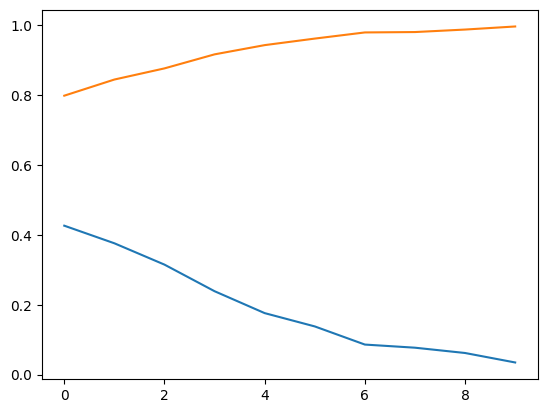

In [75]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

In [76]:
print(model(padded_sequences).numpy().argmax(axis = 1))

InvalidArgumentError: Exception encountered when calling layer 'embedding_2' (type Embedding).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[2839,612] = 23618 is not in [0, 23618) [Op:ResourceGather] name: 

Call arguments received by layer 'embedding_2' (type Embedding):
  • inputs=tf.Tensor(shape=(2840, 672), dtype=float32)

Model 1 Testing

In [77]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

10/18 [===============>..............] - ETA: 1s - loss: 1.4499 - accuracy: 0.5938

InvalidArgumentError: Graph execution error:

Detected at node sequential_2/embedding_2/embedding_lookup defined at (most recent call last):
  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 737, in start

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 524, in dispatch_queue

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in process_one

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 418, in dispatch_shell

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 758, in execute_request

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 426, in do_execute

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes

  File "C:\Users\majon\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code

  File "C:\Users\majon\AppData\Local\Temp\ipykernel_40496\2871525937.py", line 1, in <module>

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1856, in fit

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1917, in test_step

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\majon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py", line 272, in call

indices[19,612] = 23618 is not in [0, 23618)
	 [[{{node sequential_2/embedding_2/embedding_lookup}}]] [Op:__inference_test_function_11015]

In [ ]:
#Prection and Confusion Matrix
y_pred = model.predict(X_test)
bin_y_pred = (y_pred > 0.5).astype(int)

In [ ]:
bin_y_pred = np.squeeze(bin_y_pred)

In [ ]:
bin_y_pred

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = y_test
y_pred = bin_y_pred

cm = confusion_matrix(y_true, y_pred)

TN, FP, FN, TP = cm.ravel()

print(f"{'':<20}{'Predicted No':<20}{'Predicted Yes':<20}")
print(f"{'Actual No':<20}{TN:<20}{FP:<20}")
print(f"{'Actual Yes':<20}{FN:<20}{TP:<20}")

### MODEL 2

In [ ]:
# We are going to build our model with the Sequential API
model2 = Sequential()

model2.add(Embedding(total_words,      # number of words to process as input
                    50,    # output representation
                    input_length=len(padded_sequences[0])))    # total length of each observation

model2.add(LSTM(50, return_sequences=False))

model2.add(Dropout(0.2))

model2.add(Dense(1, activation='sigmoid')) 

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

In [ ]:
model2.fit(X_train, y_train, epochs=5, validation_data = (X_val, y_val), callbacks=[early_stopping])

In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)

### MODEL 3

In [ ]:
model3 = Sequential()

model3.add(Embedding(total_words,      # number of words to process as input
                    100,    # output representation
                    input_length=len(padded_sequences[0])))    # total length of each observation

model3.add(LSTM(100, return_sequences=False))

model3.add(Dense(1, activation='sigmoid')) 

model3.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

In [ ]:
model3.summary()

In [ ]:
his = model3.fit(X_train, y_train, epochs=5, validation_data = (X_val, y_val))

In [ ]:
his.history

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['accuracy'])

### MODEL 4

In [ ]:
model4 = Sequential()

model4.add(Embedding(total_words,      # number of words to process as input
                    100,    # output representation
                    input_length=len(padded_sequences[0])))    # total length of each observation

model4.add(LSTM(100, return_sequences=False))

model4.add(Dense(1, activation='sigmoid')) 

model4.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model4.summary()

In [ ]:
his2 = model4.fit(X_train, y_train, epochs=5, validation_data = (X_val, y_val))

### MODEL 5 (On Steriods)

In [ ]:
adamax_opt = Adamax(learning_rate = 0.0001)

In [ ]:
model5 = Sequential()

model5.add(Embedding(total_words,      # number of words to process as input
                    100,    # output representation
                    mask_zero = True,
                    input_length=len(padded_sequences[0])))    # total length of each observation

model5.add(Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)))

model5.add(Dropout(0.5)) 

model5.add(Bidirectional(tf.keras.layers.LSTM(100, return_sequences=False)))
#model5.add(LSTM(100, return_sequences=False))

model5.add(Dropout(0.2)) 

model5.add(Dense(1, activation='sigmoid')) 

model5.compile(optimizer=adamax_opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model5.summary()

In [ ]:
hist5 = model5.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val), callbacks=[early_stopping])

In [ ]:
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['accuracy'])

In [ ]:
loss, accuracy = model5.evaluate(X_test, y_test)

### MODEL 7

In [ ]:
from tensorflow.keras.optimizers import Adamax

In [ ]:
adamax_opt = Adamax(learning_rate = 0.001)

In [ ]:
# We are going to build our model with the Sequential API
model7 = Sequential()

model7.add(Embedding(total_words,      # number of words to process as input
                    100,    # output representation
                    input_length=len(padded_sequences[0])))    # total length of each observation

model7.add(LSTM(100, return_sequences=False))
#model7.add(Bidirectional(LSTM(100, return_sequences=False)))

model7.add(Dropout(0.2))

model7.add(Dense(1, activation='sigmoid')) 

model7.compile(optimizer= adamax_opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist7 = model7.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val), callbacks=[early_stopping])

In [ ]:
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['accuracy'])

In [ ]:
loss, accuracy = model7.evaluate(X_test, y_test)

### MODEL 9

In [ ]:
adamax_opt = Adamax(learning_rate = 0.001)

In [ ]:
# We are going to build our model with the Sequential API
model9 = Sequential()

model9.add(Embedding(total_words,      # number of words to process as input
                    100,    # output representation
                    input_length=len(padded_sequences[0])))    # total length of each observation

#model9.add(LSTM(100, return_sequences=False))
model9.add(Bidirectional(LSTM(100, return_sequences=False)))

model9.add(Dropout(0.2))

model9.add(Dense(1, activation='sigmoid')) 

model9.compile(optimizer= adamax_opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist9 = model9.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val), callbacks=[early_stopping])

In [ ]:
plt.plot(hist9.history['loss'])
plt.plot(hist9.history['accuracy'])

In [ ]:
loss, accuracy = model9.evaluate(X_test, y_test)